<a href="https://colab.research.google.com/github/kukwasrohan/Predicting-House-Prices-with-Linear-Regression-/blob/main/Predicting_House_Prices_with_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Predicting House Prices with Linear Regression



# **Data Collection  -**

In [41]:
#importing the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso


In [ ]:
from google.colab import drive#imprting google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Housing.csv' #coping the path from google drive
df = pd.read_csv(file_path) #reading the file

In [ ]:
df.head() #taking the first look of the dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Assuming 'price' is the target variable
target_variable = 'price'


In [ ]:
# Extract numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])


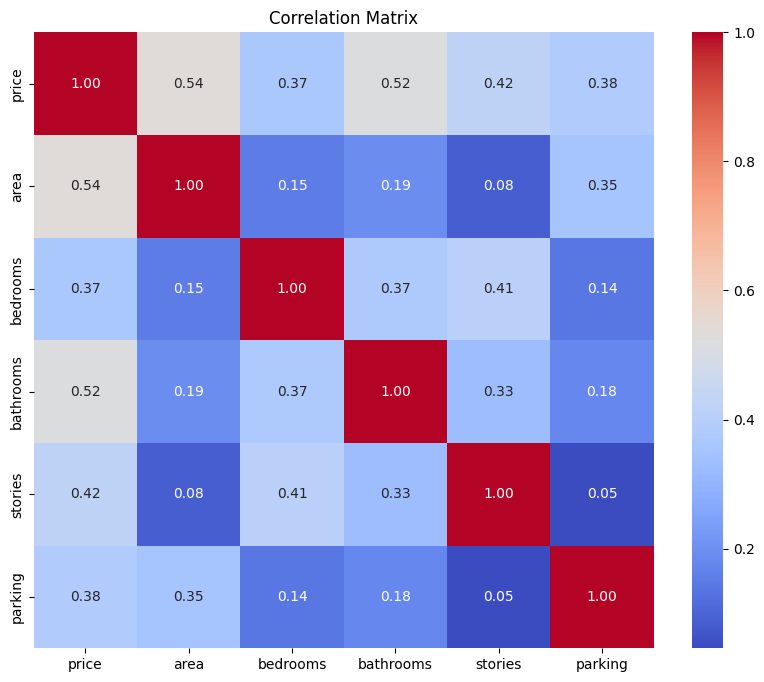

In [ ]:
# Visualize correlation matrix
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# **Data Exploration -**

In [ ]:
# Display basic information about the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Display summary statistics
df.describe()



,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


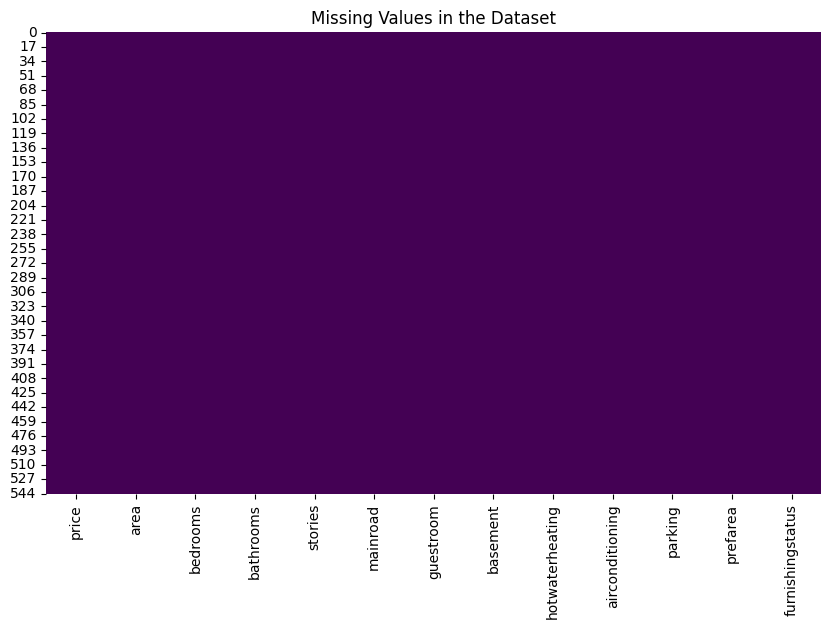

In [ ]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()


In [ ]:
# Handling missing values (replace NaN values with mean or median)
df['area'].fillna(df['area'].mean(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
# Repeat this for other numerical columns as needed



In [ ]:
# Confirm that missing values have been handled
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

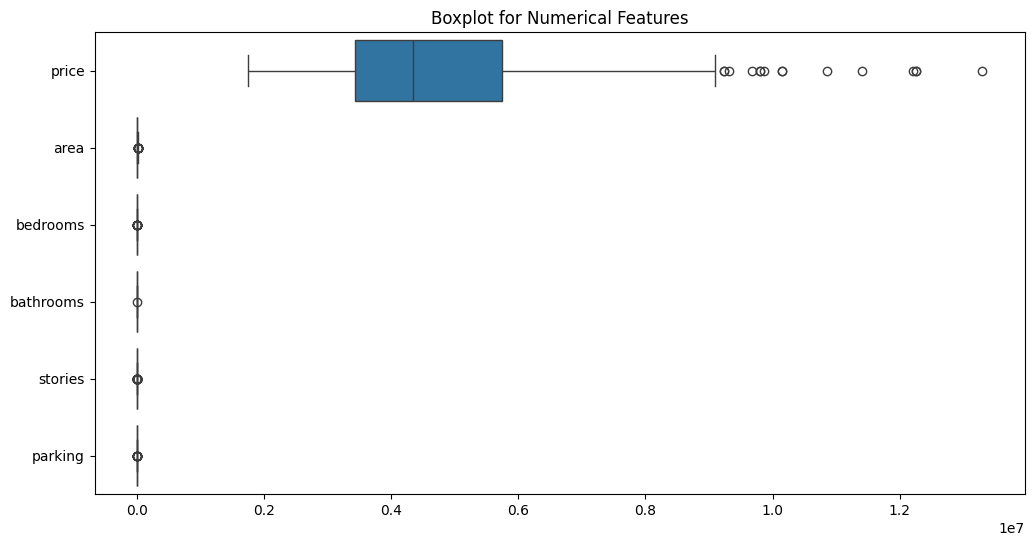

In [ ]:
# Data Quality Check
# Check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title('Boxplot for Numerical Features')
plt.show()


In [ ]:
#geeting the outlier
threshold = 3
z_scores = np.abs((df - df.mean()) / df.std())
housing_data_no_outliers = df[(z_scores < threshold).all(axis=1)]



<ipython-input-14-66aa3f47e8e6>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((df - df.mean()) / df.std())
<ipython-input-14-66aa3f47e8e6>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((df - df.mean()) / df.std())


# Feature Selection :-  


<ipython-input-15-f14fea1f1a7d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


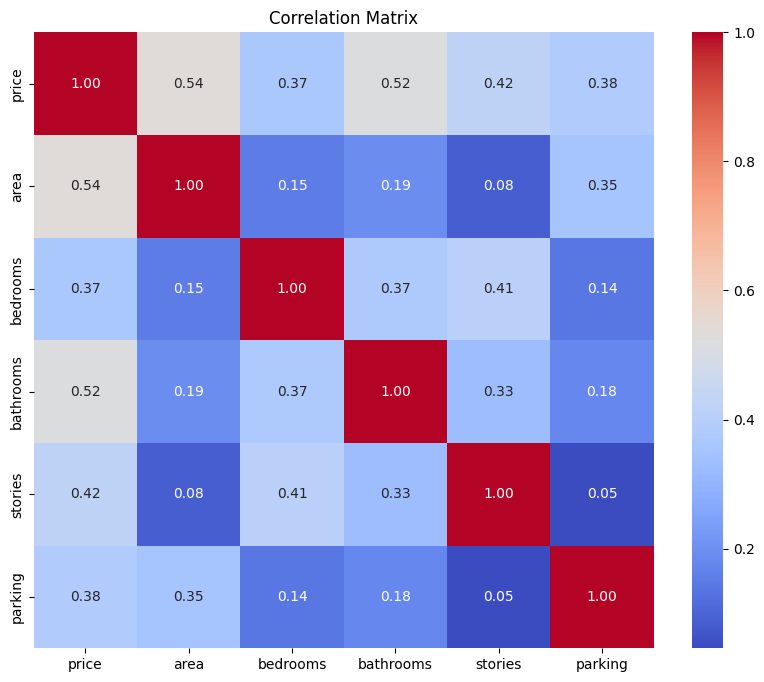

In [ ]:
correlation_matrix = df.corr() #get the corelation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



In [ ]:
target_variable = 'price' #creating the varibale with column value
correlation_with_target = df.corr()[target_variable].abs().sort_values(ascending=False)
relevant_features = correlation_with_target[1:]  # Exclude the target variable itself

<ipython-input-16-46461876d3ee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df.corr()[target_variable].abs().sort_values(ascending=False)


In [ ]:
# Identify categorical columns
categorical_columns = x.select_dtypes(include=['object']).columns

In [ ]:
# One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(x)

In [ ]:
# Display relevant features
print("Relevant Features:")
print(relevant_features)


Relevant Features:
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


In [ ]:
# Feature Selection (using SelectKBest and f_regression)
# Select top k features using SelectKBest and f_regression
k = 5
X = df.drop(target_variable, axis=1)
y = df[target_variable]
selector = SelectKBest(f_regression, k=k)

selector = SelectKBest(f_regression, k=k)
X_selected = selector.fit_transform(X_encoded, y)



In [28]:
# Display selected features
selected_features = df.columns[selector.get_support(indices=True)]
print(f"Selected Features: {selected_features}")


# ***Model Training***

In [29]:
# Feature Selection (using SelectKBest and f_regression as shown in the previous response)
k = 5  # Adjust based on your requirements
X = df.drop(target_variable, axis=1)
y = df[target_variable]
selector = SelectKBest(f_regression, k=k)

selector = SelectKBest(f_regression, k=k)
X_selected = selector.fit_transform(X_encoded, y)


In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [31]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:
predictions_on_test = model.predict(X_test)
predictions_on_train = model.predict(X_train)


#Model Evaluation

In [37]:
mse_test = mean_squared_error(y_test, predictions_on_test)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, predictions_on_test)


In [38]:
mse_train = mean_squared_error(y_train, predictions_on_train)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, predictions_on_train)


In [39]:
print("Test Set Metrics:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, R-squared: {r2_test}")
print("\nTraining Set Metrics:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, R-squared: {r2_train}")


Test Set Metrics:
MSE: 7.75005617148698e-18, RMSE: 2.783892270093615e-09, R-squared: 1.0

Training Set Metrics:
MSE: 4.551411092431695e-18, RMSE: 2.1334036402968133e-09, R-squared: 1.0


In [40]:
# Display the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-6.63738490e-10  6.63738176e-10  1.00000000e+00 -1.29633717e-14
 -9.71335561e-11]
Intercept: 5.587935447692871e-09


#Visualization

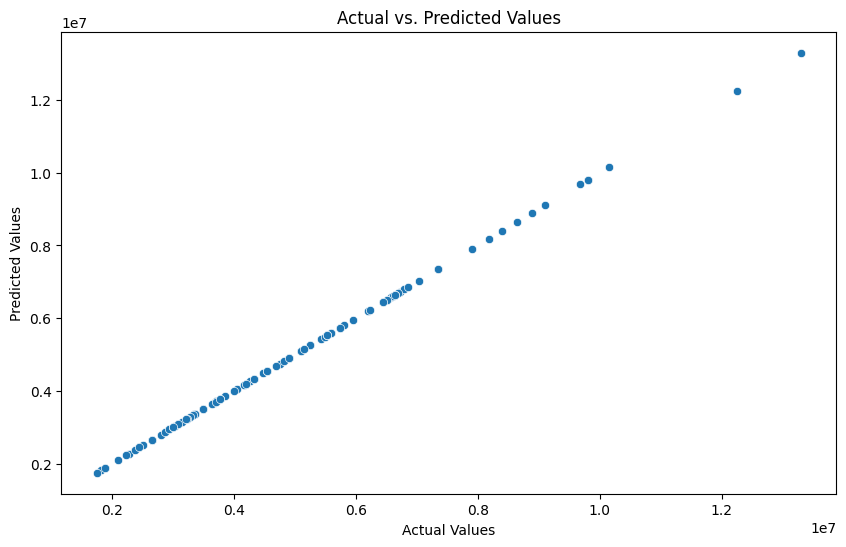

In [45]:
# Visualize the actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


Text(0.5, 1.0, 'Actual vs. Predicted Values')

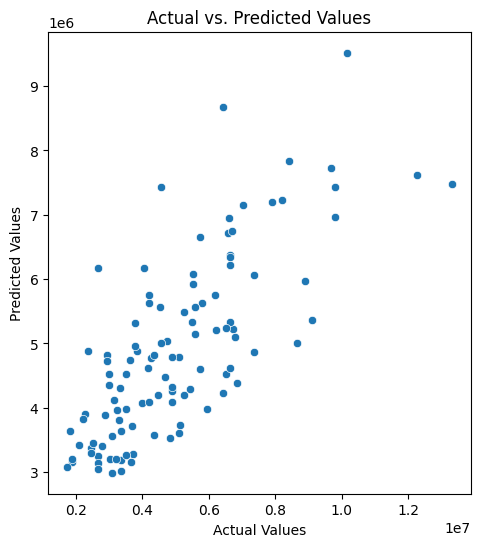

In [ ]:
# Visualize the actual vs. predicted values
plt.figure(figsize=(12, 6))

# Scatter plot for actual vs. predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")




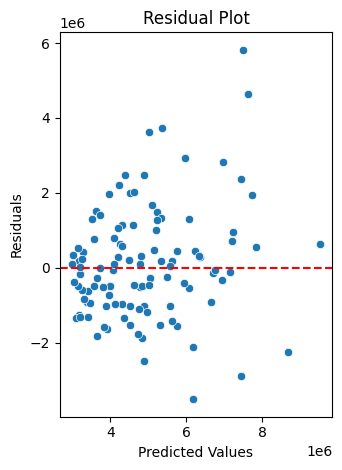

In [ ]:
# Residual plot to check for homoscedasticity
plt.subplot(1, 2, 2)
sns.scatterplot(x=predictions, y=y_test - predictions)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

plt.tight_layout()
plt.show()
